<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yellowbrick
!pip install kneed
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors


from kneed import KneeLocator
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance
import scipy.cluster.hierarchy as shc

In [3]:
data = pd.read_csv('./data/e-shop clothing 2008.csv', delimiter=';')
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [4]:
cat_vars = ['year', 'month', 'day', 'country', 'session ID',
               'page 1 (main category)', 'page 2 (clothing model)',   'colour',
               'location', 'model photography', 'price 2', 'page']

In [5]:
# Converción de variables categoricas
data[cat_vars] = data[cat_vars].astype(str)

In [6]:
from scipy.stats import mode


In [7]:

data2 = data.groupby(['country','page 1 (main category)','page 2 (clothing model)']).agg(
    median_no_of_clicks_per_session=('order', 'median'),
    min_no_of_clicks_per_session = ('order', 'max'),
    max_no_of_clicks_per_session = ('order', 'min'),
    median_price=('price', 'median'),
    min_price=('price', 'max'),
    max_price=('price', 'min'),
    total_number_of_sessions =('session ID', pd.Series.nunique),
    most_frequent_day=('day', lambda x: mode(x)[0][0]),
    most_frequent_colour=('colour', lambda x: mode(x)[0][0]),
    most_frequent_location=('location', lambda x: mode(x)[0][0]),
    most_frequent_photo_type=('model photography', lambda x: mode(x)[0][0]),
    most_frequent_price_type =('price 2', lambda x: mode(x)[0][0]),
    most_frequent_page_number =('page', lambda x: mode(x)[0][0])
)

<ipython-input-7-b71f88e873d4>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_frequent_day=('day', lambda x: mode(x)[0][0]),
<ipython-input-7-b71f88e873d4>:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  most_frequent_day=('day', lambda x: mode(x)[0][0]),
<ipython-input-7-b71f88e873d4>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis 

In [8]:
cat_vars = ['most_frequent_day',
           'most_frequent_colour', 'most_frequent_location',
           'most_frequent_photo_type', 'most_frequent_price_type',
           'most_frequent_page_number']

data2[cat_vars] = data2[cat_vars].astype(str)
data3 = pd.get_dummies(data2)
data3
     

median_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                    
1       3                      C30                                                  2.0   
        4                      P17                                                  2.0   
10      1                      A1                                                   2.0   
                               A11                                                  2.0   
                               A12                                                  3.0   
...                                                                                 ...   
9       4                      P77                                                 18.0   
                               P78                                                  6.5   
                               P80                                                 96.0   
                               P82                                                 17.5   
                               P9                                                   3.0   

                                                        min_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                                 2   
        4                      P17                                                 3   
10      1                      A1                                                  2   
                               A11                                                 3   
                               A12                                                 5   
...                                                                              ...   
9       4                      P77                                                18   
                               P78                                                95   
                               P80                                                96   
                               P82                                                18   
                               P9                                                  4   

                                                        max_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                                 2   
        4                      P17                                                 1   
10      1                      A1                                                  2   
                               A11                                                 1   
                               A12                                                 1   
...                                                                              ...   
9       4                      P77                                                18   
                               P78                                                 1   
                               P80                                                96   
                               P82                                                17   
                               P9                                                  1   

                                                        median_price  \
country page 1 (main category) page 2 (clothing model)                 
1       3                      C30                              28.0   
        4                      P17                              38.0   
10      1                      A1                               28.0   
                               A11                              62.0   
                               A12                              38.0   
...                                                              ...   
9     

In [9]:

# Estandarización
num_vars = ['median_no_of_clicks_per_session', 'min_no_of_clicks_per_session', 
           'max_no_of_clicks_per_session', 'median_price', 'min_price', 
           'max_price', 'total_number_of_sessions']
estimator = StandardScaler()

data3[num_vars] = estimator.fit_transform(data3[num_vars])
data3.head(5)

median_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                    
1       3                      C30                                            -0.784923   
        4                      P17                                            -0.784923   
10      1                      A1                                             -0.784923   
                               A11                                            -0.784923   
                               A12                                            -0.686829   

                                                        min_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                         -0.740009   
        4                      P17                                         -0.715043   
10      1                      A1                                          -0.740009   
                               A11                                         -0.715043   
                               A12                                         -0.665109   

                                                        max_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                         -0.445811   
        4                      P17                                         -0.550030   
10      1                      A1                                          -0.445811   
                               A11                                         -0.550030   
                               A12                                         -0.550030   

                                                        median_price  \
country page 1 (main category) page 2 (clothing model)                 
1       3                      C30                         -1.197785   
        4                      P17                         -0.367561   
10      1                      A1                          -1.197785   
                               A11                          1.624976   
                               A12                         -0.367561   

                                                        min_price  max_price  \
country page 1 (main category) page 2 (clothing model)                         
1       3                      C30                      -1.197785  -1.197785   
        4                      P17                      -0.367561  -0.367561   
10      1                      A1                       -1.197785  -1.197785   
                               A11                       1.624976   1.624976   
                               A12                      -0.367561  -0.367561   

                                                        total_number_of_sessions  \
country page 1 (main category) page 2 (clothing model)                             
1       3                      C30                                     -0.254235   
        4                      P17                                     -0.254235   
10      1                      A1                                      -0.254235   
                               A11                                     -0.248735   
                               A12                                     -0.232237   

                                                        most_frequent_day_1  \
country page 1 (main category) page 2 (clothing model)                        
1       3                      C30                                        0   
        4                      P17                                        0   
10      1                      A1                                         0   
                               A11                                        0   
                               A12                     

In [10]:

# Componentes principales

# Identificar que componentes explican el 85% de la variabilidad
final_comp = 0
for comp in range(3, data3.shape[1]):
  pca = PCA(n_components=comp, random_state=42)
  pca.fit(data3)
  comp_check = pca.explained_variance_ratio_
  final_comp = comp
  if comp_check.sum() > 0.85:
    break

  

final_pca = PCA(n_components=final_comp, random_state=42)
final_pca.fit(data3)
cluster_df=final_pca.transform(data3)
num_comps = comp_check.shape[0]

print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 15 components, we can explain 0.8518116568031451% of the variability in the original data.


In [11]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
cluster_df

array([[-2.05789992e+00, -1.05942924e+00, -8.66319488e-01, ...,
        -4.07789758e-01, -7.36236493e-03, -5.04013670e-02],
       [-2.81519584e-01, -8.99783898e-01, -8.68591790e-01, ...,
         4.51516727e-01, -2.95734988e-01, -1.19525070e-01],
       [-1.93993483e+00, -1.21026528e+00, -8.96004874e-01, ...,
        -8.33327370e-02, -7.75423333e-02, -4.64275831e-02],
       ...,
       [-4.11829138e+00,  1.17378751e+01,  2.73446689e+00, ...,
        -4.46871065e-01,  8.08305470e-02, -4.75245573e-01],
       [ 6.26173351e-01,  1.53975032e+00, -2.20587495e-01, ...,
        -2.95469686e-01,  4.69405933e-01, -2.45910693e-01],
       [-2.74507318e+00, -1.30239994e+00, -8.45661001e-01, ...,
        -5.73820865e-01,  2.85951564e-01, -1.55910629e-01]])

In [13]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install scikit-fda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
def plot_select_n_cluster(best_score, best_cluster, scores, clusters, **kwards):
  fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
  ax.plot(clusters, scores, marker='o')
  ax.plot(best_cluster, best_score, marker='o', color='r')
  ax.axvline(x=best_cluster,  color='r')
  ax.set_title(kwards['title'])
  ax.set_xlabel('Número clusters')
  ax.set_ylabel(kwards['y_label'])

In [18]:
def elbow(model, clusters, data, **kwards):
  """Metodo del codo"""
  range_n_clusters = range(clusters[0], clusters[1])
  inertia = {}
  for k in range_n_clusters:
    model.n_clusters= k
    model.fit(data)
    inertia[k] = model.inertia_
  
  x = list(range_n_clusters)
  y = list(inertia.values())
  kneedle = KneeLocator(x, y, S=1.0, curve="convex", direction="decreasing")
  best_inertia = inertia[kneedle.elbow]
  best_cluster = kneedle.elbow
  res_data = {
      'score': best_inertia,
      'cluster': best_cluster,
  }
  plot_select_n_cluster(best_inertia, best_cluster, y, range_n_clusters,
                        title = f'Evolución de la varianza intra-cluster total {kwards["name_model"]}',
                        y_label = 'Intra-cluster (inertia)')
  return res_data

In [19]:
def silhouette_select_cluster(model, clusters, data, **kwards):
  """Metodo silhouette"""
  range_n_clusters = range(clusters[0], clusters[1])
  valores_medios_silhouette = {}
  for k in range_n_clusters:
    model.n_clusters = k 
    model.fit(data)
    y_predict = model.predict(data)
    silhouette_avg = silhouette_score(data, y_predict)
    valores_medios_silhouette[k] = silhouette_avg
  
  x = list(range_n_clusters)
  y = list(valores_medios_silhouette.values())
  kneedle = KneeLocator(x, y, S=1.0, curve="concave", direction="increasing")

  best_score = valores_medios_silhouette[kneedle.elbow]
  best_cluster = kneedle.elbow

  res_data = {
      'score': best_score,
      'cluster': best_cluster,
  }
  plot_select_n_cluster(best_score, best_cluster, y, range_n_clusters,
                        title = f'Evolución de media de los índices silhouette {kwards["name_model"]}',
                        y_label = 'Media índices silhouette')
  
  return best_cluster, best_score

In [20]:
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
from fcmeans import FCM
from skfda.ml.clustering import FuzzyCMeans

In [21]:
data_p = pd.DataFrame(cluster_df)

In [22]:
# Fuzzy-cmeans
fcm = FCM(max_iter=300, random_state=1234, m=2)

(2, 0.2461767746288108)

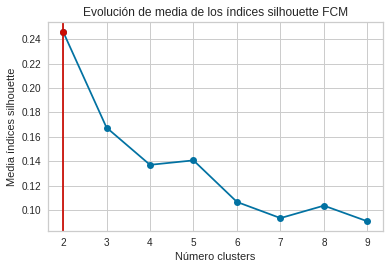

In [23]:
silhouette_select_cluster(fcm, (2,10), cluster_df, name_model = 'FCM')

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [25]:
model = FCM(n_clusters=4,max_iter=300, random_state=1234, m=2)
model.fit(cluster_df)
y_predict = model.predict(cluster_df)
silhouette_avg=silhouette_score(cluster_df, y_predict)
sample_silhouette_values = silhouette_samples(cluster_df, y_predict)
data_2 = pd.DataFrame(cluster_df)
data_2['predict'] = pd.Series(y_predict).values

In [26]:
colores=['blue','red','yellow','orange','black','pink','brown','purple']


In [27]:
def visulization_silhouette(data, y_predict, n_clusters, name, colores):
  silhouette_avg=silhouette_score(data, y_predict)
  sample_silhouette_values = silhouette_samples(data, y_predict)
  y_lower = 5
  fig, ax1 = plt.subplots(1, 1, figsize=(10,10))
  ax1.set_ylim([0, len(cluster_df) + (n_clusters + 1) * 10])
  for i in np.unique(y_predict):

    # Agregue las puntuaciones de silueta para muestras pertenecientes a
    # agrupe i, y ordénelos
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_predict == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    #color = cm.nipy_spectral(float(i) / n_clusters)


    try:
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=colores[i], edgecolor=colores[i], alpha=0.7)
    except:
      pass
    # Etiquete las parcelas de silueta con sus números de grupo en el medio
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcule el nuevo y_lower para la siguiente parcela
    y_lower = y_upper + 10  # 10 para las 0 muestras
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")
  plt.suptitle((f"Silhouette analysis for {name} clustering on sample data "
                  f"with n_clusters = {n_clusters}" ),
                 fontsize=14, fontweight='bold')

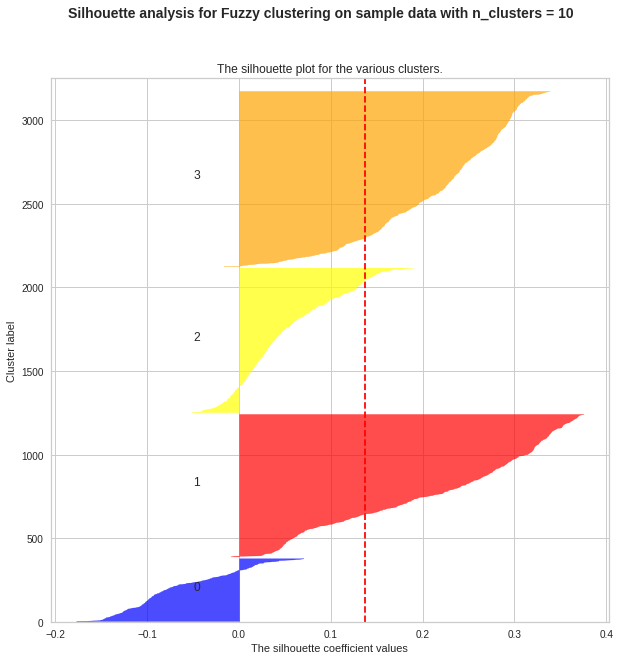

In [28]:
visulization_silhouette(cluster_df, y_predict, 10, 'Fuzzy', colores)

In [29]:
sadadasdad

NameError: ignored

In [30]:
from mpl_toolkits.mplot3d import Axes3D
clusters = np.sort(np.unique(y_predict))
def visulization_scaterplot_3d(data, clusters, target, name, colores, columns):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  asignar = []
  

  for cluster in clusters:
    xs = data[data[target]==cluster].iloc[:, 0]
    ys = data[data[target]==cluster].iloc[:, 1]
    zs = data[data[target]==cluster].iloc[:, 2]
    ax.scatter(xs, ys , zs , "o",alpha=0.3, label=cluster, c=colores[cluster])


  ax.set_xlabel(columns[0])
  ax.set_ylabel(columns[1])
  ax.set_zlabel(columns[2])
  plt.title((f" distribution analysis for {name} clustering "
                    f"with n_clusters = {len(clusters)} " ),
                  fontsize=14, fontweight='bold')
  plt.legend()
  plt.show()

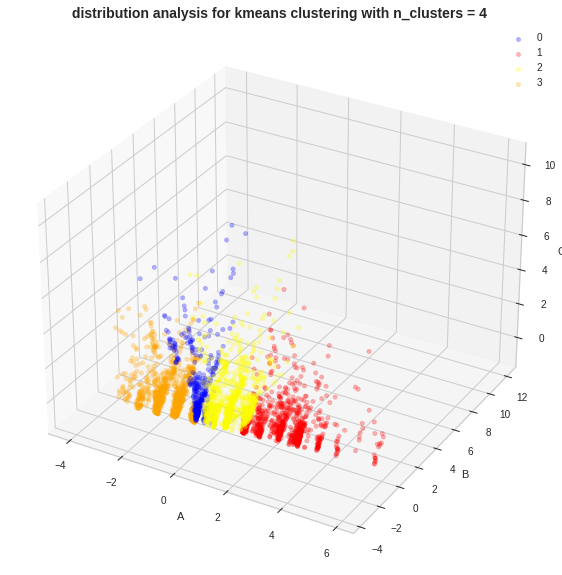

In [31]:
visulization_scaterplot_3d(data_2, clusters, "predict", "kmeans", colores, ['A', 'B', 'C'])

In [32]:
import seaborn as sns

In [33]:
def variables_incidence_conglomerates_conformation(data,target,feature, name, clusters, colores):
  sns.set()

  fig, ax = plt.subplots(1, 1)
  sc = sns.scatterplot(data, x=0, y=target, hue=target, ax=ax, palette=colores)

  norm = plt.Normalize(data[feature].min(), data[feature].max())
  #sm = plt.cm.ScalarMappable(cmap=colores, norm=norm)
  plt.title((f"Variables Incidence for {name} clustering "
                    f"with n_clusters = {len(clusters)} " ),
                  fontsize=14, fontweight='bold')
  #ax.figure.colorbar(sm)

<ipython-input-33-1909c573886f>:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sc = sns.scatterplot(data, x=0, y=target, hue=target, ax=ax, palette=colores)


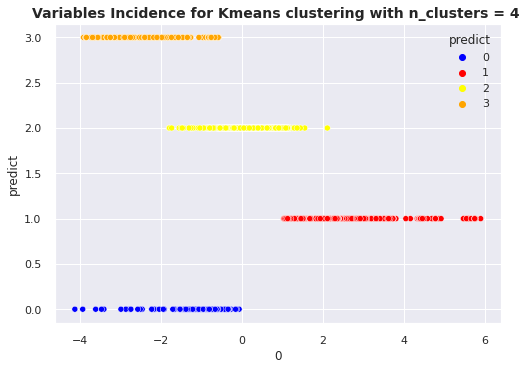

In [34]:
variables_incidence_conglomerates_conformation(data_2,'predict',0, 'Kmeans', clusters, colores)

In [48]:
def distribution_analysis_2d(data, target, clusters):
  fig, ax = plt.subplots(1, 1, figsize=(10,10))
  sns.scatterplot(data=data, x=0, y=1, hue=target, style=target, palette=colores, ax=ax)
  ax.set_title((f" distribution analysis for  clustering with n_clusters = {len(clusters)} " ),
         fontsize=14, fontweight='bold')
  plt.show()

<ipython-input-48-ef34524fadf4>:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(data=data, x=0, y=1, hue=target, style=target, palette=colores, ax=ax)


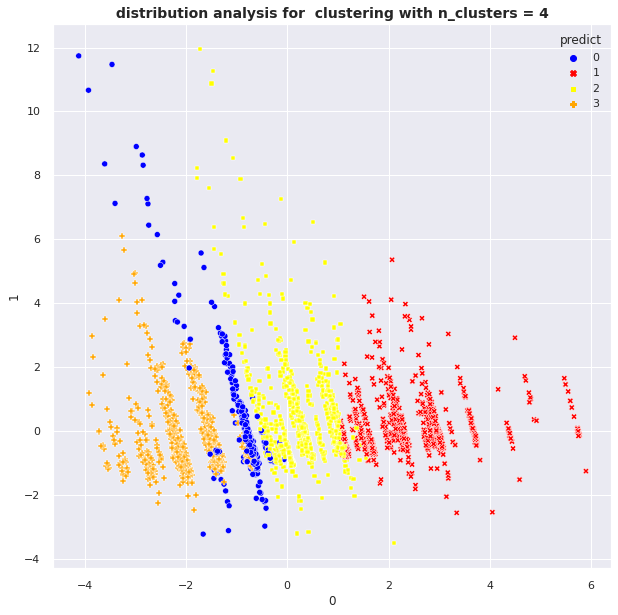

In [50]:
distribution_analysis_2d(data_2, "predict", clusters)